In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/UBION_final_project/data

/content/drive/MyDrive/UBION_final_project/data


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("v7_final.csv", encoding='cp949')
df

,회사명,거래소코드,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,경상이익증가율 (2007년 이전 발생),순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,비유동자산증가율,종업원1인당 매출액증가율,종업원1인당 인건비증가율,매출액총이익률,매출액영업이익률,매출액경상이익률 (2007년 이전 발생),매출액순이익률,총자본사업이익률,총자본영업이익률,총자본경상이익률 (2007년 이전 발생),총자본순이익률,자기자본영업이익률,자기자본경상이익률 (2007년 이전 발생),자기자본순이익률,자본금영업이익률,자본금경상이익률 (2007년 이전 발생),자본금순이익률,조세 대 조세차감전순이익률,기업경상이익률 (2007년 이전 발생),투자수익률 (2007년 이전 발생),기업순이익률,...,종업원1인당 매출액(백만원),종업원1인당 경상이익 (2007년 이전 발생)(백만원),종업원1인당 순이익(백만원),종업원1인당 인건비(백만원),노동장비율,기계장비율,자본집약도,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,부가가치(백만원).1,법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),조세공과(백만원),감가상각비(백만원),종업원1인당 부가가치(백만원).1,총자본투자효율.1,기계투자효율.1,부가가치율.1,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배)
0,(주)CMG제약,58820,2007/12,32102.0,5.0,2001/08/31,NaN,UQ,120.08,215.25,29.79,0.0,NaN,0.0,0.00,193.28,-45.98,0.00,1300.00,318.87,-96.14,-89.37,17.48,-74.30,NaN,-49.56,-5.80,-8.31,NaN,-5.55,-9.61,NaN,-6.41,-30.35,NaN,-20.25,0.0,NaN,NaN,-8.06,...,16.04,NaN,-7.95,7.49,1.08,-1.45,197.09,-1.69,-306.79,0.00,-20.72,0.00,0.00,0.00,-372.08,-890.10,839.34,-403.36,30.44,5.72,45.88,-3.32,-1.69,0.00,-20.72,112.0,0.0,0.0,13.08,1.83,0.0,0.0,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.00
1,(주)CMG제약,58820,2008/12,32102.0,5.0,2001/08/31,NaN,UQ,56.55,55.67,86.84,0.0,0.0,0.0,445.64,19.57,501.81,0.00,19.64,35.89,403.00,177.46,36.60,-35.02,0.0,-43.11,-12.32,-13.37,0.0,-16.46,-16.66,0.0,-20.50,-53.53,0.0,-65.89,0.0,0.0,0.0,-14.86,...,80.66,0.0,-34.77,20.79,16.36,1.49,257.89,-2.66,-41.89,-461.43,-8.50,0.00,0.00,0.00,-918.47,-4659.44,2786.26,452.08,85.22,51.69,365.72,-6.85,-2.66,-461.43,-8.50,134.0,0.0,0.0,4.07,0.67,0.0,0.0,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,NaN
2,(주)CMG제약,58820,2009/12,32102.0,5.0,2001/08/31,NaN,UQ,-33.92,-8.50,-41.24,0.0,0.0,0.0,42.07,-61.98,-6.12,0.00,-11.19,-27.05,5.71,48.45,24.33,-85.24,0.0,-179.14,-29.69,-30.14,0.0,-63.34,-50.63,0.0,-106.40,-107.39,0.0,-225.67,0.0,0.0,0.0,-60.16,...,85.27,0.0,-152.75,30.87,85.38,25.37,191.90,-50.50,-113.50,-381.92,-113.66,0.00,0.00,0.00,-11532.47,-18176.78,3673.20,913.42,141.94,366.86,1548.89,-96.91,-50.50,-381.92,-113.66,119.0,0.0,0.0,11.44,2.34,0.0,0.0,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,NaN
3,(주)CMG제약,58820,2010/12,32102.0,5.0,2001/08/31,NaN,UQ,5.66,-11.92,18.08,0.0,0.0,0.0,18.70,82.10,11.86,0.00,8.40,-3.72,3.19,-0.91,23.74,-65.66,0.0,-67.39,-31.70,-31.74,0.0,-32.57,-56.14,0.0,-57.61,-51.61,0.0,-52.97,0.0,0.0,0.0,-28.28,...,87.99,0.0,-59.29,30.59,69.22,17.03,187.04,-1.87,-5.06,-20.57,-3.98,0.00,0.00,0.00,-451.70,-7648.55,3945.55,1007.16,252.23,137.41,1854.52,-3.50,-1.87,-20.57,-3.98,129.0,0.0,0.0,2.54,0.82,0.0,0.0,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,NaN
4,(주)CMG제약,58820,2011/12,32102.0,5.0,2001/08/31,NaN,UQ,14.18,7.86,31.54,0.0,0.0,0.0,-4.87,6.72,56.40,0.00,4.65,-1.92,49.45,-24.54,41.83,3.93,0.0,-7.12,2.85,2.70,0.0,-4.89,3.94,0.0,-7.14,3.29,0.0,-5.96,0.0,0.0,0.0,-4.34,...,131.49,0.0,-9.37,23.08,71.32,19.75,204.06,13.77,39.40,142.24,21.37,82.14,17.86,-33.34,3793.19,-1264.49,3115.91,143.09,329.79,128.74,1340.15,28.10,13.77,142.24,21.37,135.0,0.0,0.0,3.31,1.11,0.0,0.0,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25116,흥아해운(주),3280,2016/12,85001.0,1.0,1976/06/29,NaN,UQ,22.22,39.20,-26.92,-92.9,0.0,0.0,56.39,13.60,-2.69,-30.41,15.87,31.68,-16.02,-11.88,2.95,0.15,0.0,-2.07,0.68,0.13,0.0,-1.88,0.67,0.0,-9.3

# 같은 회사명에 거래소 코드가 여러개인 애가 있음

In [ ]:
check = df.groupby(['회사명'])['거래소코드'].nunique().reset_index()
check.rename(columns={'거래소코드':'거래소코드_갯수'}, inplace=True)
check = check[ check['거래소코드_갯수']>1]

In [ ]:
check_df = df[df['회사명'].isin(check['회사명'].tolist())]
check_df = check_df.reset_index()
check_df

,index,회사명,거래소코드,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,경상이익증가율 (2007년 이전 발생),순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,비유동자산증가율,종업원1인당 매출액증가율,종업원1인당 인건비증가율,매출액총이익률,매출액영업이익률,매출액경상이익률 (2007년 이전 발생),매출액순이익률,총자본사업이익률,총자본영업이익률,총자본경상이익률 (2007년 이전 발생),총자본순이익률,자기자본영업이익률,자기자본경상이익률 (2007년 이전 발생),자기자본순이익률,자본금영업이익률,자본금경상이익률 (2007년 이전 발생),자본금순이익률,조세 대 조세차감전순이익률,기업경상이익률 (2007년 이전 발생),투자수익률 (2007년 이전 발생),...,종업원1인당 매출액(백만원),종업원1인당 경상이익 (2007년 이전 발생)(백만원),종업원1인당 순이익(백만원),종업원1인당 인건비(백만원),노동장비율,기계장비율,자본집약도,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,부가가치(백만원).1,법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),조세공과(백만원),감가상각비(백만원),종업원1인당 부가가치(백만원).1,총자본투자효율.1,기계투자효율.1,부가가치율.1,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배)
0,3589,(주)본느,226340,2019/12,32004.0,5.0,2015/11/05,NaN,UQ,22.22,2.58,19.17,89.46,NaN,914.45,-79.34,41.18,32.65,140.56,20.59,29.41,10.00,-20.77,33.15,21.55,NaN,19.11,20.52,20.17,NaN,17.89,24.06,NaN,21.33,237.53,NaN,210.64,18.59,NaN,NaN,...,803.76,NaN,153.61,46.58,0.00,0.00,0.00,25.54,211.71,3664.80,30.02,19.31,80.69,63.67,9891.78,7655.05,1909.63,-87.20,12.11,80.76,321.42,241.26,25.54,3664.80,30.02,41.0,31.59,8.82,5.86,1.63,19.37,5.41,6.04,1.69,113526.43,7423.36,22.53,207.10,246.64,15.29
1,3590,(주)본느,226340,2018/12,32004.0,5.0,2015/11/05,NaN,UQ,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.42,15.09,NaN,2.50,12.00,11.83,NaN,1.96,15.31,NaN,2.54,128.83,NaN,21.34,42.29,NaN,NaN,...,730.66,NaN,18.26,58.79,0.00,0.00,0.00,10.76,74.86,1040.74,13.73,58.62,41.38,18.21,3409.87,966.84,1998.83,117.71,92.14,108.95,125.40,100.29,10.76,1040.74,13.73,34.0,172.95,75.23,4.47,1.94,0.00,0.00,4.32,1.88,60529.18,3873.97,15.59,22.67,133.14,15.62
2,3591,(주)본느,242420,2017/12,32004.0,4.0,2016/05/16,2018/10/29,UQ,30.41,62.02,26.92,33.92,NaN,111.06,-14.47,39.22,34.53,-3.52,65.22,79.10,-18.58,-11.36,32.11,15.90,NaN,10.94,30.77,29.85,NaN,20.54,43.29,NaN,29.78,198.28,NaN,136.39,22.14,NaN,NaN,...,532.06,NaN,58.20,39.87,2.33,0.05,320.78,37.66,5177.88,259802.26,22.71,33.00,67.00,48.17,4590.71,2793.05,1514.97,36.04,152.69,47.23,46.74,120.81,37.66,259802.26,22.71,38.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3492.36,3261.57,16.13,24.32,1005.82,-1.07
3,3592,(주)본느,226340,2016/12,32004.0,5.0,2015/11/05,NaN,UQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3593,(주)본느,242420,2016/12,32004.0,4.0,2016/05/16,2018/10/29,UQ,15.69,-42.72,21.89,76.73,0.0,-42.29,34.80,20.30,34.01,0.00,0.00,-32.28,0.00,0.00,33.31,15.97,0.0,6.97,27.76,27.55,0.0,12.02,42.23,0.0,18.43,222.08,0.0,96.93,38.31,0.0,0.0,...,653.45,0.0,45.55,44.98,2.38,0.08,406.39,30.81,5262.72,149064.18,19.16,35.92,64.08,36.38,2879.92,1660.95,1034.48,-0.71,98.64,37.42,49.14,125.21,30.81,149064.18,19.16,23.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1515.16,2449.61,16.30,138.05,755.41,-0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,23432,패션플랫폼(주),256090,2016/12,31401.0,4.0,2016/12/20,2018/02/13,UQ,43.27,24.17,48.71,98.94,0.0,100.24,44.47,78.72,91.32,0.00,0.00,5.18,0.00,0.00,60.18,11.98,0.0,9.33,28.68,28.57,0.0,22.25,62.05,0.0,48.32,318.42,0.0,247.93,19.96,0.0,0.0,...,1179.64,0.0,110.07,41.67,31.98,0.00,582.71,39.34,716.76,0.00,19.43,18.18,81.82,48.01,1077

In [ ]:
check_df.groupby(['회사명','거래소코드'])['index'].count().reset_index()

,회사명,거래소코드,index
0,(주)본느,226340,6
1,(주)본느,242420,2
2,(주)세화피앤씨,85980,4
3,(주)세화피앤씨,252500,5
4,(주)신성이엔지,11930,14
5,(주)신성이엔지,104110,8
6,(주)아이엘사이언스,122050,1
7,(주)아이엘사이언스,307180,3
8,(주)알로이스,271400,2
9,(주)알로이스,297570,3


In [ ]:
# 합병등과 같은 이유로 거래소코드가 2개인 경우 데이터프레임에서 삭제
df = df[~df['회사명'].isin(check_df['회사명'])]

# 거래소코드가 같은데 회사명이 두개인 경우가 있었음

In [ ]:
check = df.groupby(['거래소코드'])['회사명'].nunique().reset_index()
check[check['회사명']>1]

,거래소코드,회사명
759,30790,2
791,32640,2


In [ ]:
print( df[df['거래소코드']==30790]['회사명'].unique() )
# '동양시스템즈(주) -> '비케이탑스(주)'

df.loc[df['회사명']=='동양시스템즈(주)', '회사명'] = '비케이탑스(주)'

['동양시스템즈(주)' '비케이탑스(주)']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
print( df[df['거래소코드']==32640]['회사명'].unique() )
#'(주)엘지텔레콤' -> '(주)엘지유플러스'

df.loc[df['회사명']=='(주)엘지텔레콤', '회사명'] = '(주)엘지유플러스'

['(주)엘지유플러스' '(주)엘지텔레콤']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
check = df.groupby(['거래소코드'])['회사명'].nunique().reset_index()
check[check['회사명']>1]

,거래소코드,회사명


# preprocessing

In [ ]:
df = df[~df['산업코드'].isnull()]

In [ ]:
df['산업코드'] = df['산업코드'].astype(int)
df['산업코드'] = df['산업코드'].astype(str).str.zfill(6)
df['산업대분류'] = df['산업코드'].str[:2]

In [ ]:
df = df[df['산업대분류'].isin(['03','10','07'])]

# outlier

In [ ]:
# 산업대분류별로 이상치 탐지

In [ ]:
df['부도여부']= 0

df.loc[(df['감사의견코드'].isin(['DS', 'DU'])) & (df['소속코드'].isin([3.0,4.0,6.0])), "부도여부"] = 1

In [ ]:
df['회계년도'] = df['회계년도'].str[0:4].astype(int)
df['left_on'] = df['회계년도']-1

In [ ]:
left_df = df[['회사명', '거래소코드','부도여부','left_on']]

In [ ]:
merged_df = pd.merge(left_df, df, left_on=['회사명','거래소코드','left_on'], right_on = ['회사명','거래소코드','회계년도'], how='left')

In [ ]:
merged_df = merged_df[~merged_df['회계년도'].isnull()]

In [ ]:
merged_df

,회사명,거래소코드,부도여부_x,left_on_x,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,경상이익증가율 (2007년 이전 발생),순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,비유동자산증가율,종업원1인당 매출액증가율,종업원1인당 인건비증가율,매출액총이익률,매출액영업이익률,매출액경상이익률 (2007년 이전 발생),매출액순이익률,총자본사업이익률,총자본영업이익률,총자본경상이익률 (2007년 이전 발생),총자본순이익률,자기자본영업이익률,자기자본경상이익률 (2007년 이전 발생),자기자본순이익률,자본금영업이익률,자본금경상이익률 (2007년 이전 발생),자본금순이익률,조세 대 조세차감전순이익률,기업경상이익률 (2007년 이전 발생),...,종업원1인당 인건비(백만원),노동장비율,기계장비율,자본집약도,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,부가가치(백만원).1,법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),조세공과(백만원),감가상각비(백만원),종업원1인당 부가가치(백만원).1,총자본투자효율.1,기계투자효율.1,부가가치율.1,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류,부도여부_y,left_on_y
1,(주)CMG제약,58820,0,2007,2007.0,032102,5.0,2001/08/31,NaN,UQ,120.08,215.25,29.79,0.00,NaN,0.00,0.00,193.28,-45.98,0.00,1300.00,318.87,-96.14,-89.37,17.48,-74.30,NaN,-49.56,-5.80,-8.31,NaN,-5.55,-9.61,NaN,-6.41,-30.35,NaN,-20.25,0.00,NaN,...,7.49,1.08,-1.45,197.09,-1.69,-306.79,0.00,-20.72,0.00,0.00,0.00,-372.08,-890.10,839.34,-403.36,30.44,5.72,45.88,-3.32,-1.69,0.00,-20.72,112.0,0.00,0.00,13.08,1.83,0.00,0.00,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.00,03,0.0,2006.0
2,(주)CMG제약,58820,0,2008,2008.0,032102,5.0,2001/08/31,NaN,UQ,56.55,55.67,86.84,0.00,0.0,0.00,445.64,19.57,501.81,0.00,19.64,35.89,403.00,177.46,36.60,-35.02,0.0,-43.11,-12.32,-13.37,0.0,-16.46,-16.66,0.0,-20.50,-53.53,0.0,-65.89,0.00,0.0,...,20.79,16.36,1.49,257.89,-2.66,-41.89,-461.43,-8.50,0.00,0.00,0.00,-918.47,-4659.44,2786.26,452.08,85.22,51.69,365.72,-6.85,-2.66,-461.43,-8.50,134.0,0.00,0.00,4.07,0.67,0.00,0.00,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,NaN,03,0.0,2007.0
3,(주)CMG제약,58820,0,2009,2009.0,032102,5.0,2001/08/31,NaN,UQ,-33.92,-8.50,-41.24,0.00,0.0,0.00,42.07,-61.98,-6.12,0.00,-11.19,-27.05,5.71,48.45,24.33,-85.24,0.0,-179.14,-29.69,-30.14,0.0,-63.34,-50.63,0.0,-106.40,-107.39,0.0,-225.67,0.00,0.0,...,30.87,85.38,25.37,191.90,-50.50,-113.50,-381.92,-113.66,0.00,0.00,0.00,-11532.47,-18176.78,3673.20,913.42,141.94,366.86,1548.89,-96.91,-50.50,-381.92,-113.66,119.0,0.00,0.00,11.44,2.34,0.00,0.00,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,NaN,03,0.0,2008.0
4,(주)CMG제약,58820,0,2010,2010.0,032102,5.0,2001/08/31,NaN,UQ,5.66,-11.92,18.08,0.00,0.0,0.00,18.70,82.10,11.86,0.00,8.40,-3.72,3.19,-0.91,23.74,-65.66,0.0,-67.39,-31.70,-31.74,0.0,-32.57,-56.14,0.0,-57.61,-51.61,0.0,-52.97,0.00,0.0,...,30.59,69.22,17.03,187.04,-1.87,-5.06,-20.57,-3.98,0.00,0.00,0.00,-451.70,-7648.55,3945.55,1007.16,252.23,137.41,1854.52,-3.50,-1.87,-20.57,-3.98,129.0,0.00,0.00,2.54,0.82,0.00,0.00,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,NaN,03,0.0,2009.0
5,(주)CMG제약,58820,0,2011,2011.0,032102,5.0,2001/08/31,NaN,UQ,14.18,7.86,31.54,0.00,0.0,0.00,-4.87,6.72,56.40,0.00,4.65,-1.92,49.45,-24.54,41.83,3.93,0.0,-7.12,2.85,2.70,0.0,-4.89,3.94,0.0,-7.14,3.29,0.0,-5.96,0.00,0.0,...,23.08,71.32,19.75,204.06,13.77,39.40,142.24,21.37,82.14,17.86,-33.34,3793.19,-1264.49,3115.91,143.09,329.79,128.74,1340.15,28.10,13.77,142.24,21.37,135.0,0.00,0.00,3.31,1.11,0.00,0.00,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.52,03,0.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,흥구석유(주),24060,0,2015,2015.0,074607,5.0,1994/12/07,NaN,UQ,12.89,-0.74,-15.96,-60.19,0.0,63.95,-23.42,3.11,-19.73,32.13,-8.33,21.85,-12.43,7.13,4.71,0.30,0.0,1.89,0.79,0.63,0.0,3.98,0.69,0.0,4.36,30.83,0.0,195.42,29.42,0.0,...,33.87,407.21,2.08,788

In [ ]:
merged_df.drop(columns = ['부도여부_y','left_on_x','left_on_y'], inplace=True)
merged_df.rename(columns = {'부도여부_x': '차기부도여부'}, inplace=True)
merged_df

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,경상이익증가율 (2007년 이전 발생),순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,비유동자산증가율,종업원1인당 매출액증가율,종업원1인당 인건비증가율,매출액총이익률,매출액영업이익률,매출액경상이익률 (2007년 이전 발생),매출액순이익률,총자본사업이익률,총자본영업이익률,총자본경상이익률 (2007년 이전 발생),총자본순이익률,자기자본영업이익률,자기자본경상이익률 (2007년 이전 발생),자기자본순이익률,자본금영업이익률,자본금경상이익률 (2007년 이전 발생),자본금순이익률,조세 대 조세차감전순이익률,기업경상이익률 (2007년 이전 발생),투자수익률 (2007년 이전 발생),...,종업원1인당 경상이익 (2007년 이전 발생)(백만원),종업원1인당 순이익(백만원),종업원1인당 인건비(백만원),노동장비율,기계장비율,자본집약도,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,부가가치(백만원).1,법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),조세공과(백만원),감가상각비(백만원),종업원1인당 부가가치(백만원).1,총자본투자효율.1,기계투자효율.1,부가가치율.1,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
1,(주)CMG제약,58820,0,2007.0,032102,5.0,2001/08/31,NaN,UQ,120.08,215.25,29.79,0.00,NaN,0.00,0.00,193.28,-45.98,0.00,1300.00,318.87,-96.14,-89.37,17.48,-74.30,NaN,-49.56,-5.80,-8.31,NaN,-5.55,-9.61,NaN,-6.41,-30.35,NaN,-20.25,0.00,NaN,NaN,...,NaN,-7.95,7.49,1.08,-1.45,197.09,-1.69,-306.79,0.00,-20.72,0.00,0.00,0.00,-372.08,-890.10,839.34,-403.36,30.44,5.72,45.88,-3.32,-1.69,0.00,-20.72,112.0,0.00,0.00,13.08,1.83,0.00,0.00,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.00,03
2,(주)CMG제약,58820,0,2008.0,032102,5.0,2001/08/31,NaN,UQ,56.55,55.67,86.84,0.00,0.0,0.00,445.64,19.57,501.81,0.00,19.64,35.89,403.00,177.46,36.60,-35.02,0.0,-43.11,-12.32,-13.37,0.0,-16.46,-16.66,0.0,-20.50,-53.53,0.0,-65.89,0.00,0.0,0.0,...,0.0,-34.77,20.79,16.36,1.49,257.89,-2.66,-41.89,-461.43,-8.50,0.00,0.00,0.00,-918.47,-4659.44,2786.26,452.08,85.22,51.69,365.72,-6.85,-2.66,-461.43,-8.50,134.0,0.00,0.00,4.07,0.67,0.00,0.00,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,NaN,03
3,(주)CMG제약,58820,0,2009.0,032102,5.0,2001/08/31,NaN,UQ,-33.92,-8.50,-41.24,0.00,0.0,0.00,42.07,-61.98,-6.12,0.00,-11.19,-27.05,5.71,48.45,24.33,-85.24,0.0,-179.14,-29.69,-30.14,0.0,-63.34,-50.63,0.0,-106.40,-107.39,0.0,-225.67,0.00,0.0,0.0,...,0.0,-152.75,30.87,85.38,25.37,191.90,-50.50,-113.50,-381.92,-113.66,0.00,0.00,0.00,-11532.47,-18176.78,3673.20,913.42,141.94,366.86,1548.89,-96.91,-50.50,-381.92,-113.66,119.0,0.00,0.00,11.44,2.34,0.00,0.00,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,NaN,03
4,(주)CMG제약,58820,0,2010.0,032102,5.0,2001/08/31,NaN,UQ,5.66,-11.92,18.08,0.00,0.0,0.00,18.70,82.10,11.86,0.00,8.40,-3.72,3.19,-0.91,23.74,-65.66,0.0,-67.39,-31.70,-31.74,0.0,-32.57,-56.14,0.0,-57.61,-51.61,0.0,-52.97,0.00,0.0,0.0,...,0.0,-59.29,30.59,69.22,17.03,187.04,-1.87,-5.06,-20.57,-3.98,0.00,0.00,0.00,-451.70,-7648.55,3945.55,1007.16,252.23,137.41,1854.52,-3.50,-1.87,-20.57,-3.98,129.0,0.00,0.00,2.54,0.82,0.00,0.00,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,NaN,03
5,(주)CMG제약,58820,0,2011.0,032102,5.0,2001/08/31,NaN,UQ,14.18,7.86,31.54,0.00,0.0,0.00,-4.87,6.72,56.40,0.00,4.65,-1.92,49.45,-24.54,41.83,3.93,0.0,-7.12,2.85,2.70,0.0,-4.89,3.94,0.0,-7.14,3.29,0.0,-5.96,0.00,0.0,0.0,...,0.0,-9.37,23.08,71.32,19.75,204.06,13.77,39.40,142.24,21.37,82.14,17.86,-33.34,3793.19,-1264.49,3115.91,143.09,329.79,128.74,1340.15,28.10,13.77,142.24,21.37,135.0,0.00,0.00,3.31,1.11,0.00,0.00,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.52,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,흥구석유(주),24060,0,2015.0,074607,5.0,1994/12/07,NaN,UQ,12.89,-0.74,-15.96,-60.19,0.0,63.95,-23.42,3.11,-19.73,32.13,-8.33,21.85,-12.43,7.13,4.71,0.30,0.0,1.89,0.79,0.63,0.0,3.98,0.69,0.0,4.36,30.83,0.0,195.42,29.42,

In [ ]:
merged_df[merged_df['차기부도여부']==1]['회사명'].nunique()

214

In [ ]:
qneh_df = merged_df[merged_df['차기부도여부']==1]
qneh_df = qneh_df.reset_index()
check = qneh_df.groupby(['거래소코드'])['index'].count().reset_index()
check.rename(columns={'index':'부도_cnt'}, inplace=True)

In [ ]:
company = check[check['부도_cnt']>1]['거래소코드'].tolist()

merged_df[merged_df['거래소코드'].isin(company)]

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,경상이익증가율 (2007년 이전 발생),순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,비유동자산증가율,종업원1인당 매출액증가율,종업원1인당 인건비증가율,매출액총이익률,매출액영업이익률,매출액경상이익률 (2007년 이전 발생),매출액순이익률,총자본사업이익률,총자본영업이익률,총자본경상이익률 (2007년 이전 발생),총자본순이익률,자기자본영업이익률,자기자본경상이익률 (2007년 이전 발생),자기자본순이익률,자본금영업이익률,자본금경상이익률 (2007년 이전 발생),자본금순이익률,조세 대 조세차감전순이익률,기업경상이익률 (2007년 이전 발생),투자수익률 (2007년 이전 발생),...,종업원1인당 경상이익 (2007년 이전 발생)(백만원),종업원1인당 순이익(백만원),종업원1인당 인건비(백만원),노동장비율,기계장비율,자본집약도,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,부가가치(백만원).1,법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),조세공과(백만원),감가상각비(백만원),종업원1인당 부가가치(백만원).1,총자본투자효율.1,기계투자효율.1,부가가치율.1,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
2553,(주)모다,149940,1,2018.0,032604,4.0,2012/09/25,2020/07/10,DU,-71.32,-32.92,-80.68,0.00,NaN,0.00,-33.57,-76.03,-34.99,0.00,-66.67,-69.14,95.02,110.37,17.44,-63.36,NaN,-93.01,-10.04,-10.05,NaN,-14.75,-37.61,NaN,-55.21,-122.48,NaN,-179.80,0.00,NaN,NaN,...,NaN,-430.74,79.42,0.00,0.00,0.00,-6.87,-206.23,-214.53,-19.31,0.00,0.00,0.00,-3756.07,-18090.87,3335.44,7442.90,637.54,543.37,2375.55,-89.43,-6.87,-214.53,-19.31,42.0,0.00,0.00,18.85,0.26,0.00,0.00,11.91,0.16,38948.62,-9948.29,-51.15,-1.33,-470.14,0.00,03
2554,(주)모다,149940,1,2016.0,032604,4.0,2012/09/25,2020/07/10,UQ,271.12,-5.56,-9.69,0.00,0.0,0.00,-27.62,150.69,111.81,254.28,21.90,853.98,73.75,10.94,37.50,6.33,0.0,-0.75,4.68,4.36,0.0,-0.52,11.20,0.0,-1.33,53.41,0.0,-6.33,0.00,0.0,0.0,...,0.0,-2.76,31.25,18.87,17.88,840.53,9.32,415.40,438.23,21.32,39.87,60.13,-3.52,10031.15,-646.12,3999.78,3059.57,665.49,81.64,2870.78,78.37,9.32,438.23,21.32,128.0,0.00,0.00,5.90,1.68,113.09,32.11,4.09,1.16,180931.13,5849.42,12.43,1.78,492.36,30.93,03
2555,(주)모다,149940,1,2017.0,032604,4.0,2012/09/25,2020/07/10,DS,77.20,12.45,103.63,0.00,0.0,0.00,25.01,39.09,-36.41,-242.25,-1.56,72.01,-35.40,20.81,-15.82,-72.38,0.0,-124.82,-14.43,-14.52,0.0,-25.05,-47.66,0.0,-82.20,-274.35,0.0,-473.12,0.00,0.0,0.0,...,0.0,-296.42,37.75,21.55,19.79,1513.09,-7.37,-517.30,-563.43,-46.95,0.00,0.00,0.00,-14046.43,-35098.02,4756.51,12616.92,819.35,221.83,2636.98,-111.48,-7.37,-563.43,-46.95,126.0,0.00,0.00,4.86,1.91,0.00,0.00,8.07,3.18,271730.00,-19020.77,-63.57,-1.49,-1004.34,0.00,03
2556,(주)모다,149940,0,2012.0,032604,4.0,2012/09/25,2020/07/10,UQ,17.27,-3.90,26.04,-87.02,0.0,-83.03,-8.50,64.48,-30.84,0.00,0.00,1.05,0.00,0.00,26.19,2.97,0.0,2.97,5.52,4.94,0.0,4.93,6.62,0.0,6.62,52.35,0.0,52.30,0.95,0.0,0.0,...,0.0,10.07,23.06,25.77,24.72,220.38,23.81,203.65,212.27,15.45,43.95,56.05,19.19,5772.62,1102.38,2536.96,-85.51,660.71,16.19,1541.90,52.48,23.81,212.27,15.45,110.0,55.91,26.70,3.38,1.61,0.00,0.00,1.66,0.79,28712.18,2650.84,7.10,60.09,552.10,10.83,03
2557,(주)모다,149940,0,2014.0,032604,4.0,2012/09/25,2020/07/10,UQ,10.97,-3.38,6.24,0.00,0.0,0.00,-2.20,-20.55,-43.30,-124.74,0.00,20.97,-43.30,0.33,13.56,-36.04,0.0,-33.29,-26.05,-27.10,0.0,-25.03,-35.79,0.0,-33.06,-141.50,0.0,-130.69,0.00,0.0,0.0,...,0.0,-63.51,30.66,26.68,24.94,266.88,-5.18,-51.81,-55.42,-7.25,0.00,0.00,0.00,-1396.17,-7343.17,3096.63,200.65,657.85,46.02,1945.85,-13.82,-5.18,-55.42,-7.25,101.0,0.00,0.00,8.01,3.05,0.00,0.00,5.43,2.07,64869.09,-4998.73,-25.94,-10.64,-509.24,0.00,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20796,현진소재(주),53660,0,2012.0,032509,6.0,2002/02/15,NaN,UQ,-10.54,-15.49,-13.30,-47.34,0.0,-52.41,-21.26,0.85,-15.83,4.70,-7.83,-7.44,-8.68,37.08

In [ ]:
merged_df[merged_df['차기부도여부']==1]

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,상장폐지일,감사의견코드,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,경상이익증가율 (2007년 이전 발생),순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,비유동자산증가율,종업원1인당 매출액증가율,종업원1인당 인건비증가율,매출액총이익률,매출액영업이익률,매출액경상이익률 (2007년 이전 발생),매출액순이익률,총자본사업이익률,총자본영업이익률,총자본경상이익률 (2007년 이전 발생),총자본순이익률,자기자본영업이익률,자기자본경상이익률 (2007년 이전 발생),자기자본순이익률,자본금영업이익률,자본금경상이익률 (2007년 이전 발생),자본금순이익률,조세 대 조세차감전순이익률,기업경상이익률 (2007년 이전 발생),투자수익률 (2007년 이전 발생),...,종업원1인당 경상이익 (2007년 이전 발생)(백만원),종업원1인당 순이익(백만원),종업원1인당 인건비(백만원),노동장비율,기계장비율,자본집약도,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,부가가치(백만원).1,법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),조세공과(백만원),감가상각비(백만원),종업원1인당 부가가치(백만원).1,총자본투자효율.1,기계투자효율.1,부가가치율.1,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
260,(주)고제,2540,1,2008.0,032001,4.0,1989/10/12,2010/04/23,UQ,18.01,-8.76,-37.58,0.00,0.0,0.0,-88.62,9510.60,-89.62,0.00,-73.68,58.49,-60.54,71.21,-45.47,-666.08,0.0,-1356.98,-11.04,-11.05,0.0,-22.50,-34.20,0.0,-69.67,-13.47,0.0,-27.43,0.00,0.0,0.0,...,0.0,-386.55,58.34,773.87,17.02,1859.54,-12.66,-30.41,-1383.22,-826.22,0.00,0.00,0.00,-4707.11,-7730.98,1166.78,1363.57,341.70,11.39,140.43,-235.36,-12.66,-1383.22,-826.22,20.0,0.00,0.00,2.44,0.32,0.00,0.00,94.00,12.36,7505.54,-3654.32,-641.43,-2.68,-72.67,NaN,03
273,(주)골드앤에스,35290,1,2018.0,105801,6.0,1999/12/07,NaN,UQ,149.92,3222.08,91.64,0.00,NaN,0.0,22.05,5.82,-32.19,0.00,29.79,256.14,-47.76,3.60,49.91,-52.52,NaN,-46.61,-14.99,-15.33,NaN,-13.61,-33.81,NaN,-30.00,-40.58,NaN,-36.01,0.00,NaN,NaN,...,NaN,-66.33,51.20,0.00,0.00,0.00,2.08,8.28,14.45,10.16,354.23,-254.23,-458.91,881.62,-4714.76,3122.99,922.33,424.41,231.54,895.11,14.45,2.08,14.45,10.16,61.0,0.00,0.00,12.50,3.53,0.00,0.00,19.16,5.40,79136.43,-3664.02,-42.21,-3.58,-165.24,0.00,10
473,(주)금빛,45890,1,2019.0,032804,6.0,2005/11/28,NaN,UQ,-7.19,-0.60,-25.14,0.00,NaN,0.0,-18.75,-38.91,9.61,-663.86,-14.35,7.53,27.98,24.05,13.72,-30.16,NaN,-70.40,-15.40,-15.77,NaN,-36.80,-39.25,NaN,-91.61,-102.80,NaN,-239.93,0.00,NaN,NaN,...,NaN,-217.26,48.06,0.00,0.00,0.00,-22.95,-42.94,-2442.14,-42.27,0.00,0.00,0.00,-23347.65,-38578.01,8602.00,3551.71,164.21,271.01,2641.43,-130.43,-22.95,-2442.14,-42.27,179.0,0.00,0.00,6.31,1.51,0.00,0.00,3.54,0.85,143916.08,-14021.12,-25.38,-3.56,-486.07,0.00,03
507,(주)기린,6070,1,2007.0,031007,4.0,1989/06/20,2009/05/13,UQ,33.39,61.21,-2.37,0.00,NaN,0.0,3.37,-34.92,21.75,-78.08,-5.43,65.44,28.74,0.28,24.87,-10.70,NaN,-17.02,-6.48,-6.63,NaN,-10.55,-25.02,NaN,-39.80,-38.28,NaN,-60.88,0.00,NaN,NaN,...,NaN,-27.16,16.15,175.67,43.01,294.22,3.54,5.94,24.25,6.54,154.82,-54.82,-260.46,5266.82,-12502.31,8154.22,3523.91,169.07,359.35,5562.58,10.43,3.54,24.25,6.54,505.0,0.00,0.00,2.75,1.46,36.65,19.50,0.92,0.49,116497.18,-3061.87,-3.80,-0.82,-67.95,0.00,03
564,(주)나노하이텍,71360,1,2007.0,032602,4.0,2003/10/24,2009/04/29,UQ,-33.16,-5.93,-42.64,0.00,NaN,0.0,-31.58,-18.95,-45.04,0.00,-24.85,21.55,-26.87,7.34,0.77,-11.52,NaN,-15.44,-8.14,-8.98,NaN,-12.03,-20.63,NaN,-27.65,-64.76,NaN,-86.79,0.00,NaN,NaN,...,NaN,-43.74,14.08,43.49,7.42,291.39,-2.51,-16.80,-98.43,-2.58,0.00,0.00,0.00,-905.96,-4119.48,1746.06,622.71,0.90,41.89,801.96,-7.31,-2.51,-98.43,-2.58,124.0,0.00,0.00,2.59,0.70,0.00,0.00,1.29,0.35,22236.09,-3245.51,-9.24,-3.25,-259.64,0.00,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19837,한국기술산업(주),8320,1,2008.0,032803,4.0,1989/09/29,2010/03/11,QG,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,46.67,0.00,0.00,0.00,-6.73,-95.68,0.0,-273

In [ ]:
first_bankruptcy=pd.DataFrame(columns=['회사명'])
first_bankruptcy['회사명'] = merged_df['회사명'].unique()

first_bankruptcy.head()

,회사명
0,(주)CMG제약
1,(주)DB하이텍
2,(주)ES큐브
3,(주)LG데이콤
4,(주)MH에탄올


In [ ]:
check = merged_df[merged_df['차기부도여부']==1][['회사명','회계년도','차기부도여부']].sort_values(by=['회사명', '회계년도', '차기부도여부'], ascending=[True, True, True])
check = check.drop_duplicates(['회사명'], keep='first')
check.drop(columns='차기부도여부', inplace=True)
check

,회사명,회계년도
260,(주)고제,2008.0
273,(주)골드앤에스,2018.0
473,(주)금빛,2019.0
507,(주)기린,2007.0
564,(주)나노하이텍,2007.0
...,...,...
19599,파나케이아(주),2019.0
19837,한국기술산업(주),2008.0
20561,해원에스티(주),2008.0
20757,현대페인트(주),2014.0


In [ ]:
first_bankruptcy = pd.merge(first_bankruptcy, check, how ='left', on='회사명')
first_bankruptcy['회계년도'] = first_bankruptcy['회계년도'].fillna(2021.0)
first_bankruptcy.rename(columns={'회계년도' : '첫_부도일-1'}, inplace=True)

In [ ]:
first_bankruptcy[first_bankruptcy['첫_부도일-1']!=2021.0]

,회사명,첫_부도일-1
22,(주)고제,2008.0
23,(주)골드앤에스,2018.0
43,(주)금빛,2019.0
48,(주)기린,2007.0
56,(주)나노하이텍,2007.0
...,...,...
1992,파나케이아(주),2019.0
2017,한국기술산업(주),2008.0
2082,해원에스티(주),2008.0
2105,현대페인트(주),2014.0


In [ ]:
final_df  = pd.DataFrame()

tmp_list = []
for row, col  in first_bankruptcy.iterrows():
  tmp = merged_df[(merged_df['회사명'] == col['회사명']) & (merged_df['회계년도']<= col['첫_부도일-1'])]
  tmp_list.append(tmp)
final_df = pd.concat(tmp_list)

In [ ]:
final_df[final_df['차기부도여부']==1].groupby(['회사명'])['차기부도여부'].count().reset_index()

,회사명,차기부도여부
0,(주)고제,1
1,(주)골드앤에스,1
2,(주)금빛,1
3,(주)기린,1
4,(주)나노하이텍,1
...,...,...
209,파나케이아(주),1
210,한국기술산업(주),1
211,해원에스티(주),1
212,현대페인트(주),1


In [ ]:
final_df['거래소코드'] = final_df['거래소코드'].astype(int)
final_df['거래소코드'] = final_df['거래소코드'].astype(str).str.zfill(6)
final_df['거래소코드'] = final_df['거래소코드'].astype(str)

In [ ]:
final_df['NaN_cnt'] = final_df.isnull().sum(1)
final_df = final_df[final_df['NaN_cnt'] < 166]
final_df.drop(columns=['NaN_cnt'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
check = final_df.isnull().sum(0).reset_index()
check = check.sort_values(by=0, ascending=False)
check.head(50)

,index,0
7,상장폐지일,16850
136,종업원1인당 경상이익 (2007년 이전 발생)(백만원),5313
39,투자수익률 (2007년 이전 발생),5312
35,자본금경상이익률 (2007년 이전 발생),5312
32,자기자본경상이익률 (2007년 이전 발생),5312
29,총자본경상이익률 (2007년 이전 발생),5312
25,매출액경상이익률 (2007년 이전 발생),5312
67,1주당경상이익 (2007년 이전 발생)(원),5312
38,기업경상이익률 (2007년 이전 발생),5312
13,경상이익증가율 (2007년 이전 발생),5312


In [ ]:
drop_col = check['index'][:10].tolist()
final_df.drop(columns=drop_col, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_df['EV/EBITDA(배)'] = round(final_df['기업가치(EV)(백만원)']/final_df['EBITDA(백만원)'], 3)
final_df.loc[(final_df['EV/EBITDA(배)'] < 0), 'EV/EBITDA(배)'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
import numpy as np
# 'EV/EBITDA(배)'가 nan / Inf 값 버리기
final_df = final_df[np.isfinite(final_df['EV/EBITDA(배)'])]

In [ ]:
final_df.fillna(0, inplace=True)
final_df

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,감사의견코드,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,비유동자산증가율,종업원1인당 매출액증가율,종업원1인당 인건비증가율,매출액총이익률,매출액영업이익률,매출액순이익률,총자본사업이익률,총자본영업이익률,총자본순이익률,자기자본영업이익률,자기자본순이익률,자본금영업이익률,자본금순이익률,조세 대 조세차감전순이익률,기업순이익률,경영자본영업이익률,경영자본순이익률,매출원가 대 매출액비율,영업비율,영업외손익률,금융비용부담률,외환이익 대 매출액비율,...,종업원1인당 매출액(백만원),종업원1인당 순이익(백만원),종업원1인당 인건비(백만원),노동장비율,기계장비율,자본집약도,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,부가가치(백만원).1,법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),조세공과(백만원),감가상각비(백만원),종업원1인당 부가가치(백만원).1,총자본투자효율.1,기계투자효율.1,부가가치율.1,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
1,(주)CMG제약,058820,0,2007.0,032102,5.0,2001/08/31,UQ,120.08,215.25,29.79,0.00,0.00,0.00,193.28,-45.98,0.00,1300.00,318.87,-96.14,-89.37,17.48,-74.30,-49.56,-5.80,-8.31,-5.55,-9.61,-6.41,-30.35,-20.25,0.00,-8.06,-13.44,-8.97,82.52,174.30,24.73,-22.46,0.43,...,16.04,-7.95,7.49,1.08,-1.45,197.09,-1.69,-306.79,0.00,-20.72,0.00,0.00,0.00,-372.08,-890.10,839.34,-403.36,30.44,5.72,45.88,-3.32,-1.69,0.00,-20.72,112.0,0.00,0.00,13.08,1.83,0.00,0.00,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.000,03
2,(주)CMG제약,058820,0,2008.0,032102,5.0,2001/08/31,UQ,56.55,55.67,86.84,0.00,0.00,445.64,19.57,501.81,0.00,19.64,35.89,403.00,177.46,36.60,-35.02,-43.11,-12.32,-13.37,-16.46,-16.66,-20.50,-53.53,-65.89,0.00,-14.86,-21.06,-25.92,63.40,135.02,-8.09,4.18,-0.21,...,80.66,-34.77,20.79,16.36,1.49,257.89,-2.66,-41.89,-461.43,-8.50,0.00,0.00,0.00,-918.47,-4659.44,2786.26,452.08,85.22,51.69,365.72,-6.85,-2.66,-461.43,-8.50,134.0,0.00,0.00,4.07,0.67,0.00,0.00,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,0.133,03
3,(주)CMG제약,058820,0,2009.0,032102,5.0,2001/08/31,UQ,-33.92,-8.50,-41.24,0.00,0.00,42.07,-61.98,-6.12,0.00,-11.19,-27.05,5.71,48.45,24.33,-85.24,-179.14,-29.69,-30.14,-63.34,-50.63,-106.40,-107.39,-225.67,0.00,-60.16,-38.13,-80.13,75.67,185.24,-93.89,9.00,0.02,...,85.27,-152.75,30.87,85.38,25.37,191.90,-50.50,-113.50,-381.92,-113.66,0.00,0.00,0.00,-11532.47,-18176.78,3673.20,913.42,141.94,366.86,1548.89,-96.91,-50.50,-381.92,-113.66,119.0,0.00,0.00,11.44,2.34,0.00,0.00,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,0.000,03
4,(주)CMG제약,058820,0,2010.0,032102,5.0,2001/08/31,UQ,5.66,-11.92,18.08,0.00,0.00,18.70,82.10,11.86,0.00,8.40,-3.72,3.19,-0.91,23.74,-65.66,-67.39,-31.70,-31.74,-32.57,-56.14,-57.61,-51.61,-52.97,0.00,-28.28,-32.60,-33.46,76.26,165.66,-1.73,8.87,-0.02,...,87.99,-59.29,30.59,69.22,17.03,187.04,-1.87,-5.06,-20.57,-3.98,0.00,0.00,0.00,-451.70,-7648.55,3945.55,1007.16,252.23,137.41,1854.52,-3.50,-1.87,-20.57,-3.98,129.0,0.00,0.00,2.54,0.82,0.00,0.00,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,0.000,03
5,(주)CMG제약,058820,0,2011.0,032102,5.0,2001/08/31,UQ,14.18,7.86,31.54,0.00,0.00,-4.87,6.72,56.40,0.00,4.65,-1.92,49.45,-24.54,41.83,3.93,-7.12,2.85,2.70,-4.89,3.94,-7.14,3.29,-5.96,0.00,-4.34,2.79,-5.05,58.17,96.07,-11.06,0.81,-0.02,...,131.49,-9.37,23.08,71.32,19.75,204.06,13.77,39.40,142.24,21.37,82.14,17.86,-33.34,3793.19,-1264.49,3115.91,143.09,329.79,128.74,1340.15,28.10,13.77,142.24,21.37,135.0,0.00,0.00,3.31,1.11,0.00,0.00,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.522,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,흥구석유(주),024060,0,2015.0,074607,5.0,1994/12/07,UQ,12.89,-0.74,-15.96,-60.19,63.95,-23.42,3.11,-19.73,32.13,-8.33,21.85,-12.43,7.13,4.71,0.30,1.89,0.79,0.63,3.98,0.69,4.36,30.83,195.42,29.42,3.90,0.83,5.27,

In [ ]:
final_df.to_csv("final_df.csv", index=False)

# train / test split

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_te

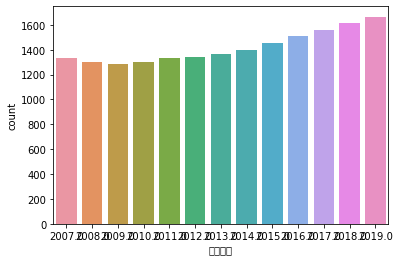

In [ ]:
import seaborn as sns
sns.countplot(x='회계년도', data=final_df)

In [ ]:
print( len(final_df[final_df['회계년도'] >= 2018]) , len(final_df[final_df['회계년도'] <2018]) )
len(final_df[final_df['회계년도'] >= 2018])/ len(final_df[final_df['회계년도'] <2018])

3276 15167


0.2159952528515857

In [ ]:
drop_col = ['회사명', '거래소코드', '산업코드', '소속코드', '상장일', '감사의견코드','산업대분류']
final_df.drop(columns=drop_col, inplace=True)

In [ ]:
test = final_df[final_df['회계년도'] >= 2018]
train = final_df[final_df['회계년도'] < 2018]

In [ ]:
test.drop(columns = '회계년도', inplace=True)
train.drop(columns= '회계년도', inplace=True )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(len(train), len(test))

print(len(test)/len(train))

15167 3276
0.2159952528515857


In [ ]:
test.to_csv('test.csv', index=False)
train.to_csv('train.csv', index=False)